# Linear Regression - OLS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
gss_2006 = pd.read_csv('/gdrive/My Drive/Data Analysis GR5015/GSS_2006.csv')
wvs_data = pd.read_csv('/gdrive/My Drive/Data Analysis GR5015/WVS.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (266,318,322,2251,2269,3265,3293,3295,3317,3386,3412,3413,3416,3417,3430,3434,3435,3436,3437,3438,3439,3440,3441,3443,3448,3449,3450,3451,3452,3453,3454,3455,3456,3458,3461,3462,3463,3479,3480,3481,3482,3483,3484,3488,3493,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3516,3517,3518,3519,3522,3523,3537,4650,4652,4851,4912,4913,4918,4919,4924,4925,4930,4931,4936,4937,4939,4941,4942,4943,4944,4945,4947,4948,4949,4950,4951,4953,4956,4957,4962,4963,4968,4969,4971,4972,4973,4974,4975,4977,4978,4979,4980,4981,4986,4987,4998,4999,5000,5001,5002,5003,5004,5005,5021,5022,5023,5024,5025,5026,5027,5028,5035,5036,5037,5038,5039,5040,5041,5042,5066,5067,5078,5079) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Question 1
1. Run a simple bivariate regression, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)

I Choose to use the income data(REALINC) from the survey and compare it with how difficult or easy do you think it would be for you to find a job at least as good as your current one?(JOBEASY)

#### **Observations**

- For every unit increase in the income thet is $1000 dollars increase people think 0.0013 points easier to find a job that pays as good as their current one.

- The intercept tells us that at $1000 income people feel "Neither easy nor difficult" to find a job that pays as well 

- Intuitively, this is not too obvious but explains that reason why a job is high paying in the first place


In [ ]:
# Coverting the salary range into units of $1000 by dividing the salaries with 1000
gss_2006['realrinc1000s'] = round((gss_2006['realrinc'])/1000)
gss_2006.realrinc1000s.value_counts()

25.0     292
18.0     217
113.0    213
30.0     194
15.0     188
37.0     168
21.0     162
12.0     137
6.0      122
9.0      110
10.0     109
8.0      107
13.0     104
2.0       98
45.0      93
4.0       75
1.0       73
5.0       57
55.0      51
0.0       48
3.0       39
66.0      29
77.0      13
Name: realrinc1000s, dtype: int64

In [ ]:
gss_2006.big5c2.value_counts()

2.0    704
1.0    545
3.0    144
4.0    101
5.0     21
Name: big5c2, dtype: int64

In [ ]:
# Encoding the textual responses to numeric range 1-5
gss_2006.loc[gss_2006['jobeasy']=='Very easy', 'jobeasy'] = '5'
gss_2006.loc[gss_2006['jobeasy']=='Fairly easy', 'jobeasy'] = '4'
gss_2006.loc[gss_2006['jobeasy']=='Neither easy nor difficult', 'jobeasy'] = '3'
gss_2006.loc[gss_2006['jobeasy']=='Fairly difficult', 'jobeasy'] = '2'
gss_2006.loc[gss_2006['jobeasy']=='Very difficult', 'jobeasy'] = '1'
gss_2006[['jobeasy']] = gss_2006[['jobeasy']].apply(pd.to_numeric)

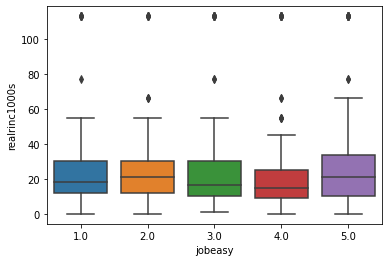

In [ ]:
# plotting a box plot to see how the trend for medians evolve and the range 
sns.boxplot(x="jobeasy", y="realrinc1000s", data=gss_2006)

In [ ]:
# Running a simple OLS regression
lm_rep = smf.ols(formula = 'jobeasy~realrinc1000s', data = gss_2006).fit()
print (lm_rep.summary())

                            OLS Regression Results                            
Dep. Variable:                jobeasy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6508
Date:                Sat, 27 Feb 2021   Prob (F-statistic):              0.420
Time:                        03:26:25   Log-Likelihood:                -1379.9
No. Observations:                 833   AIC:                             2764.
Df Residuals:                     831   BIC:                             2773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0510      0.061     49.904